# Hypothesis Testing 

# T Test

### One-sample t-test

You can create a randomized vector with the function rnorm().

### Example:

Suppose you are a company producing cookies. Each cookie is supposed to contain 10 grams of sugar. The cookies are produced by a machine that adds the sugar in a bowl before mixing everything. You believe the machine does not add 10 grams of sugar for each cookie. If your assumption is true, the machine needs to be fixed. You stored the level of sugar of thirty cookies.

**nrorm(n,mean,sd)**
* n: number of observation in your sample
* mean: the mean of the distributions
* sd : the standard deviation

The set. seed() function sets the starting number used to generate a sequence of random numbers – it ensures that you get the same result if you start with that same seed each time you run the same process.

In [1]:
set.seed(123) 
sugar_cookie <- rnorm(30,mean = 9.99,sd = 0.04)

In [2]:
head(sugar_cookie)

[1]  9.967581  9.980793 10.052348  9.992820  9.995172 10.058603

You can use a one-sample t-test to check whether the level of sugar is different than the recipe. You can draw a hypothesis test:

* H0: The average level of sugar is equal to 10
* H3: The average level of sugar is different than 10

In [3]:
t.test(sugar_cookie,mu = 10)


	One Sample t-test

data:  sugar_cookie
t = -1.6588, df = 29, p-value = 0.1079
alternative hypothesis: true mean is not equal to 10
95 percent confidence interval:
  9.973463 10.002769
sample estimates:
mean of x 
 9.988116 


**The p-value of the one sample t-test is 0.1079 and above 0.05.**

# Paired t-test

#### Example:

A beverage company is interested in knowing the performance of a discount program on the sales. The company decided to follow the daily sales of one of its shops where the program is being promoted. At the end of the program, the company wants to know if there is a statistical difference between the average sales of the shop before and after the program.

* The company tracked the sales everyday before the program started. This is our first vector.
* The program is promoted for one week and the sales are recorded every day. This is our second vector.
* You will perform the t-test to judge the effectiveness of the program. This is called a paired t-test because the values of both vectors come from the same distribution (i.e., the same shop).

The hypothesis testing is:

* H0: No difference in mean
* H3: The two means are different

In [4]:
set.seed(123)
sales_before <- rnorm(7,mean = 500000, sd = 50)
sales_after <- rnorm(7,mean = 50075, sd = 50)
t.test(sales_before,sales_after,var.equal = TRUE)


	Two Sample t-test

data:  sales_before and sales_after
t = 19865, df = 12, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 449900.3 449999.0
sample estimates:
mean of x mean of y 
500022.46  50072.84 


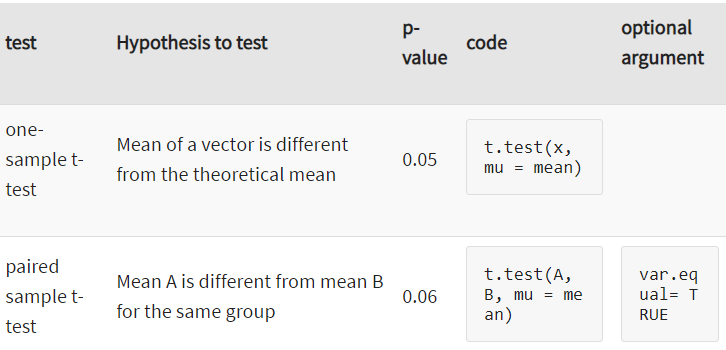

In [7]:
library("IRdisplay")
display_png(file='t_test.png',width = 700,height=200)

# ANOVA 

Analysis of Variance (ANOVA) is a statistical technique, commonly used to studying differences between two or more group means. ANOVA test is centred on the different sources of variation in a typical variable. ANOVA in R primarily provides evidence of the existence of the mean equality between the groups. This statistical method is an extension of the t-test. It is used in a situation where the factor variable has more than one group.

There are many situations where you need to compare the mean between multiple groups. For instance, the marketing department wants to know if three teams have the same sales performance.<br>

* Team: 3 level factor: A, B, and C
* Sale: A measure of performance
The ANOVA test can tell if the three groups have similar performances.
<br>
To clarify if the data comes from the same population, you can perform a one-way analysis of variance (one-way ANOVA hereafter). This test, like any other statistical tests, gives evidence whether the H0 hypothesis can be accepted or rejected.

### Hypothesis in one-way ANOVA test:
H0: The means between groups are identical<br>
H3: At least, the mean of one group is different<br>
In other words, the H0 hypothesis implies that there is not enough evidence to prove the mean of the group (factor) are different from another.

This test is similar to the t-test, although ANOVA test is recommended in situation with more than 2 groups. Except that, the t-test and ANOVA provide similar results.

#### Example One way ANOVA Test

You will use the poison dataset to implement the one-way ANOVA test. The dataset contains 48 rows and 3 variables:

1. Time: Survival time of the animalpoison: Type of poison used: factor level: 1,2 and 3
2. treat: Type of treatment used: factor level: 1,2 and 3

Before you start to compute the ANOVA test, you need to prepare the data as follow:

* Step 1: Import the data
* Step 2: Remove unnecessary variable
* Step 3: Convert the variable poison as ordered level

In [8]:
library(dplyr)
PATH <- "https://raw.githubusercontent.com/guru99-edu/R-Programming/master/poisons.csv"

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [9]:
df <- read.csv(PATH)

In [10]:
head(df)

X,time,poison,treat
1,0.31,1,A
2,0.45,1,A
3,0.46,1,A
4,0.43,1,A
5,0.36,2,A
6,0.29,2,A


In [22]:
PATH <- "https://raw.githubusercontent.com/guru99-edu/R-Programming/master/poisons.csv"
df <- read.csv(PATH) %>%
select(-X) %>% 
mutate(poison = factor(poison, ordered = TRUE))
glimpse(df)

Rows: 48
Columns: 3
$ time   <dbl> 0.31, 0.45, 0.46, 0.43, 0.36, 0.29, 0.40, 0.23, 0.22, 0.21, ...
$ poison <ord> 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, ...
$ treat  <fct> A, A, A, A, A, A, A, A, A, A, A, A, B, B, B, B, B, B, B, B, ...


Our objective is to test the following assumption:

* H0: There is no difference in survival time average between group
* H3: The survival time average is different for at least one group.

1. Step 1: Check the format of the variable poison
2. Step 2: Print the summary statistic: count, mean and standard deviation
3. Step 3: Plot a box plot
4. Step 4: Compute the one-way ANOVA test
5. Step 5: Run a pairwise t-test

# Step 1

In [25]:
levels(df$poison)

[1] "1" "2" "3"

# Step 2) 
You compute the mean and standard deviation.

In [26]:
df %>%
group_by(poison) %>%
summarise(
    count_poison = n(),
    mean_time = mean(time,na.rm = TRUE),
    sd_time = sd(time,na.rm = TRUE))

`summarise()` ungrouping output (override with `.groups` argument)


poison,count_poison,mean_time,sd_time
1,16,0.617500,0.20942779
2,16,0.544375,0.28936641
3,16,0.276250,0.06227627


## Step 3) 
In step three, you can graphically check if there is a difference between the distribution. Note that you include the jittered dot.

Jittering” is a technique for separating overlapping marks on a view

In [28]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

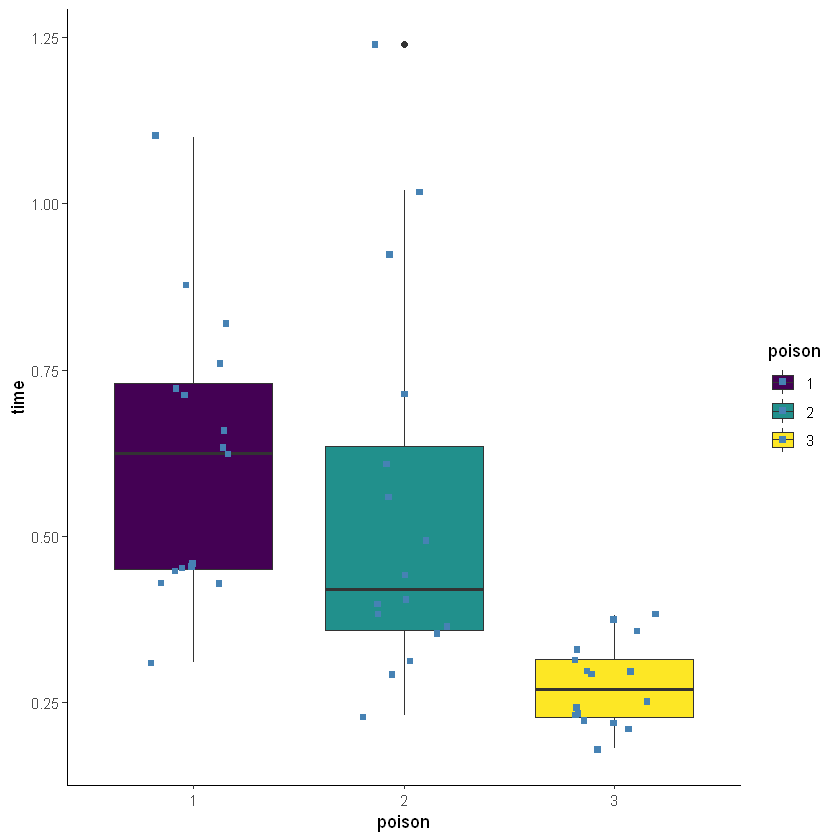

In [29]:
ggplot(df, aes(x = poison, y = time, fill = poison)) +
    geom_boxplot() +
    geom_jitter(shape = 15,
        color = "steelblue",
        position = position_jitter(0.21)) +
    theme_classic()

### Step 4)
You can run the one-way ANOVA test with the command aov. The basic syntax for an ANOVA test is:

aov(formula, data)
Arguments:			
- formula: The equation you want to estimate
- data: The dataset used

In [30]:
anova_one_way <- aov(time~poison, data = df)
summary(anova_one_way)

            Df Sum Sq Mean Sq F value   Pr(>F)    
poison       2  1.033  0.5165   11.79 7.66e-05 ***
Residuals   45  1.972  0.0438                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The p-value is lower than the usual threshold of 0.05.

# Pairwise comparison
The one-way ANOVA test does not inform which group has a different mean. Instead, you can perform a Tukey test with the function TukeyHSD().

In [31]:
TukeyHSD(anova_one_way)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = time ~ poison, data = df)

$poison
         diff        lwr         upr     p adj
2-1 -0.073125 -0.2525046  0.10625464 0.5881654
3-1 -0.341250 -0.5206296 -0.16187036 0.0000971
3-2 -0.268125 -0.4475046 -0.08874536 0.0020924


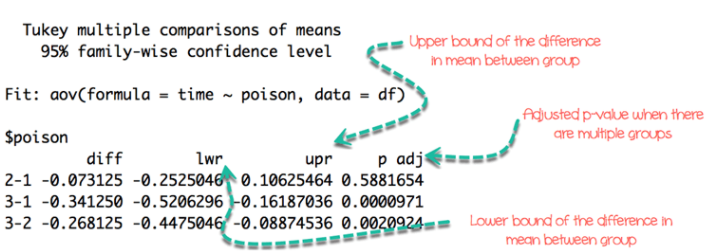

In [32]:
display_png(file='tukey_test.PNG',width = 700,height=200)

# Two-way ANOVA
A two-way ANOVA test adds another group variable to the formula. It is identical to the one-way ANOVA test, t

Hypothesis in two-way ANOVA test:
* H0: The means are equal for both variables (i.e., factor variable)
* H3: The means are different for both variables

In [33]:
anova_two_way <- aov(time~poison + treat, data = df)
summary(anova_two_way)

            Df Sum Sq Mean Sq F value  Pr(>F)    
poison       2 1.0330  0.5165   20.64 5.7e-07 ***
treat        3 0.9212  0.3071   12.27 6.7e-06 ***
Residuals   42 1.0509  0.0250                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

You can conclude that both poison and treat are statistically different from 0. You can reject the NULL hypothesis and confirm that changing the treatment or the poison impact the time of survival.

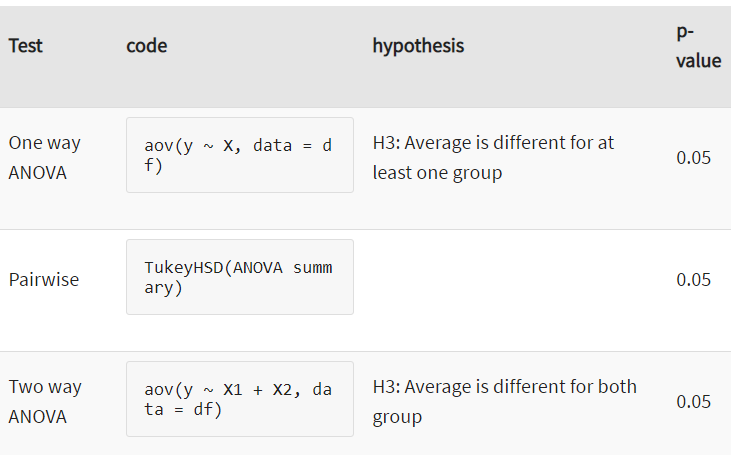

In [34]:
display_png(file='anb.PNG',width = 700,height=200)